In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

In [ ]:
df = pd.read_csv("classroom_actions.csv")
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [ ]:
# Create dataframe with all control records
control_df = df.query('group == "control"')

# Compute completion rate
control_cr = control_df.completed.sum()/control_df.shape[0]

# Display completion rate
control_cr

0.3719951923076923

In [ ]:
# Create dataframe with all experiment records
experiment_df = df.query('group == "experiment"')

# Compute completion rate
experiment_cr = experiment_df.completed.sum()/experiment_df.shape[0]

# Display completion rate
experiment_cr

0.3935334872979215

In [ ]:
# Compute observed difference in completion rates
obs_diff = experiment_cr - control_cr

# Display observed difference in completion rates
obs_diff

0.02153829499022919

In [ ]:
# Create sampling distribution for difference in completion rates
# with boostrapping
diffs = []
for _ in range(10000):
  b_sample = df.sample(df.shape[0], replace=True)
  control_mean = b_sample.query('group == "control"')
  experiment_mean = b_sample.query('group == "experiment"')
  control_mean = control_mean.completed.sum()/control_mean.shape[0]
  experiment_mean = experiment_mean.completed.sum() / experiment_mean.shape[0]
  diffs.append(experiment_mean - control_mean)

In [ ]:
# convert to numpy array
diffs = np.array(diffs)

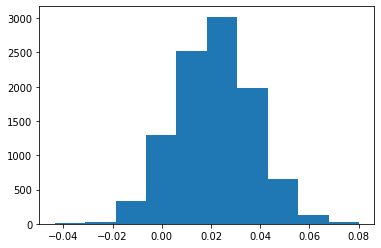

In [ ]:
plt.hist(diffs);

In [ ]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.shape[0])

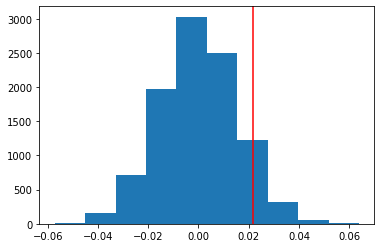

In [ ]:
# plot null distribution
plt.hist(null_vals);

# plot line for observed statistic
plt.axvline(obs_diff, color = 'red');

In [ ]:
(null_vals > obs_diff).mean()

0.0821